# Conditions that Affect Poverty within a School District
*by: Sakeena Aimandi*
## Problem Statement
The development of children ages 5 to 17 is greatly influenced by their education system. Data shows that children who grow up in poverty-ridden households experience below average skills in terms of reading and math, as well as stunted social development. Considering that socioeconomic status has a large impact on the education attainment of children, it is crucial that the government ensures an education system that best supports children’s academic outcomes in poorer towns. To offer some basis on this issue, we can create a model to decide whether or not a particular school district has a large portion of households in poverty as to provide appropriate funding.

### Research Question: What factors affect poverty within a school district?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("NHGIS_District_data (2).xlsx")

Saving NHGIS_District_data (2).xlsx to NHGIS_District_data (2).xlsx


## Exploratory Data Analysis

We can first do some basic data cleaning, including renaming columns, and creating dummy variables.

In [ ]:
new_columns = {"School ID" : "school_id",
               "State" : "state",
               "Geographic School District" :"geographic_school_district",
               "Children 5-17 (SAIPE Estimate)": "children_aged_5-17",
               "% Poverty (SAIPE Estimate)": "pc_poverty",
               "% Single Parent Estimate" : "pc_single_parent",
               "Single Parent Margin of Error" : "single_parent_moe",
               "% HHs With Vulnerable Job Estimate" : "pc_vulnerable_job",
               "Vulnerable Job Margin of Error" : "vulnerable_job_moe",
               "% Crowded Conditions Estimate": "pc_crowded_conditions",
               "HH With Crowded Conditions Margin of Error" : "crowded_conditions_moe",
               "% No Computer or Internet Estimate" : "pc_no_computer_or_internet",
               "No Computer or Internet Margin of Error" : "no_computer_or_internet_moe",
               "% Children with Disability" : "pc_children_w_disability",
               "Children with Disability Margin of Error" : "children_w_disability_moe",
               "% Linguistically Isolated Children" : "pc_linguistically_isolated_children",
               "Linguistically Isolated Children Margin of Error" : "linguistically_isolated_children_moe"}

df.rename(columns=new_columns, inplace=True)

# Reassigning school district values based on large, medium, and small
def get_district_size(val):
  if val > 10000:
    return 2
  elif val > 2500:
    return 1
  else:
    return 0

df['school_district_size'] = df['children_aged_5-17'].apply(get_district_size)

# Creating a numerical variable for state
unique_states = df.state.unique()
start = 0
state_num = dict()
for state in unique_states:
  state_num[state] = start
  start += 1
  
def get_state_num(val):
  return state_num[val]

df['state_num'] = df['state'].apply(get_state_num)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13314 entries, 0 to 13313
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   school_id                             13314 non-null  int64  
 1   state                                 13314 non-null  object 
 2   geographic_school_district            13314 non-null  object 
 3   children_aged_5-17                    13314 non-null  int64  
 4   pc_poverty                            13314 non-null  float64
 5   pc_single_parent                      13314 non-null  float64
 6   single_parent_moe                     13314 non-null  object 
 7   pc_vulnerable_job                     13314 non-null  float64
 8   vulnerable_job_moe                    13314 non-null  object 
 9   pc_crowded_conditions                 13314 non-null  float64
 10  crowded_conditions_moe                13314 non-null  object 
 11  pc_no_computer_

Some definitions. . .
+ linguistically isolated : there is no one age 14 or older in the household who speaks English only or speaks it “very well.”
+ vulnerable job : the parent earns less than $800 a week and
works in one of the industries subject to layoffs
+ crowded conditions : living in a household with greater than one household member per room

In [ ]:
df.head()

,school_id,state,geographic_school_district,children_aged_5-17,pc_poverty,pc_single_parent,single_parent_moe,pc_vulnerable_job,vulnerable_job_moe,pc_crowded_conditions,crowded_conditions_moe,pc_no_computer_or_internet,no_computer_or_internet_moe,pc_children_w_disability,children_w_disability_moe,pc_linguistically_isolated_children,linguistically_isolated_children_moe,school_district_size,state_num
0,1,Alabama,Fort Rucker School District,985,0.124424,0.048975,0%-10%,0.327559,20%-46%,0.028090,0%-8%,0.020489,0%-5%,0.032487,0%-6%,0.000000,0%-3%,0,0
1,3,Alabama,Maxwell AFB School District,292,0.152263,0.101887,3%-17%,0.306513,4%-57%,0.009967,0%-10%,0.014528,0%-6%,0.054795,2%-9%,0.000000,0%-8%,0,0
2,5,Alabama,Albertville City School District,4591,0.300538,0.352926,26%-44%,0.326535,28%-37%,0.047664,3%-7%,0.221471,13%-32%,0.018079,0%-3%,0.173601,10%-24%,1,0
3,6,Alabama,Marshall County School District,8299,0.266222,0.295197,24%-35%,0.234867,21%-26%,0.026383,2%-3%,0.142486,11%-18%,0.043499,3%-6%,0.038679,1%-7%,1,0
4,7,Alabama,Hoover City School District,15397,0.072596,0.208316,17%-25%,0.292165,27%-31%,0.015485,1%-2%,0.031688,1%-5%,0.038774,2%-5%,0.044164,1%-8%,2,0


We can visualize the percent of linguistically isolated children by state. Notice that Puerto Rico is much much higher, followed by California.

In [ ]:
# Setting basic sns themes
sns.set(rc={'figure.figsize':(30.7,11.7)})
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Average Percent of HH with Linguistically Isolated Children by State')

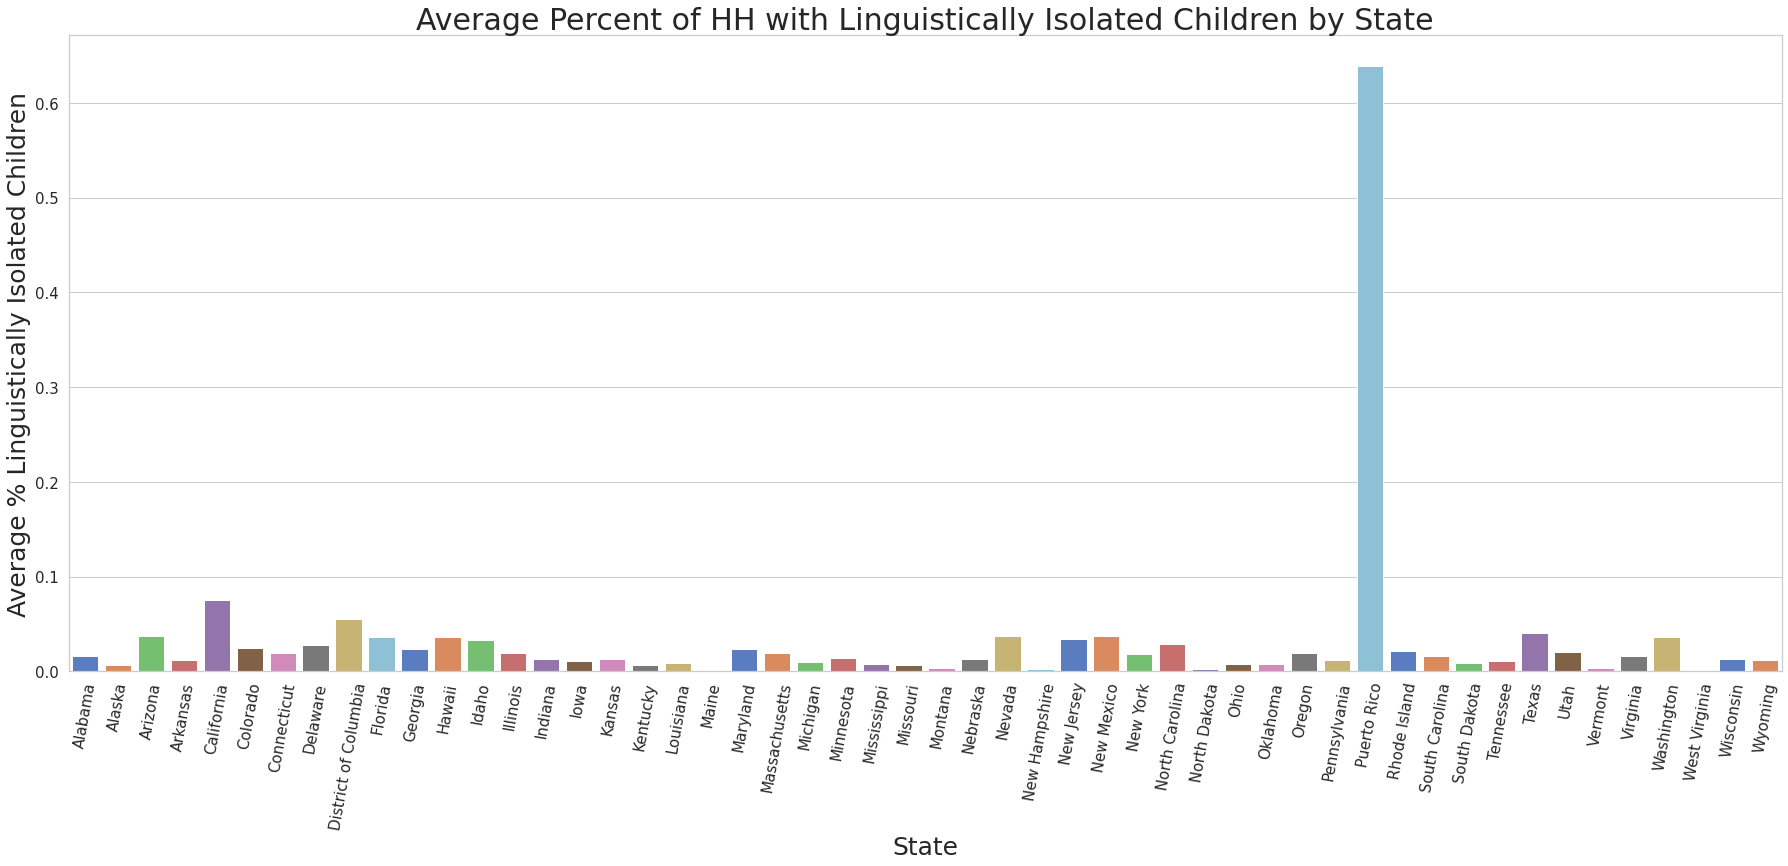

In [ ]:
grouped1 = df.groupby('state').agg({'pc_linguistically_isolated_children': ['mean']})
grouped1.columns = ['pc_linguistically_isolated_children']
grouped1 = grouped1.reset_index()
sns.barplot(data=grouped1, x="state", y="pc_linguistically_isolated_children", palette="muted")
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("State", fontsize=25)
plt.ylabel("Average % Linguistically Isolated Children", fontsize=25)
plt.title("Average Percent of HH with Linguistically Isolated Children by State", fontdict = {'fontsize' : 30})

Text(0.5, 1.0, 'Average Percent of HH with No Computer/Internet by State')

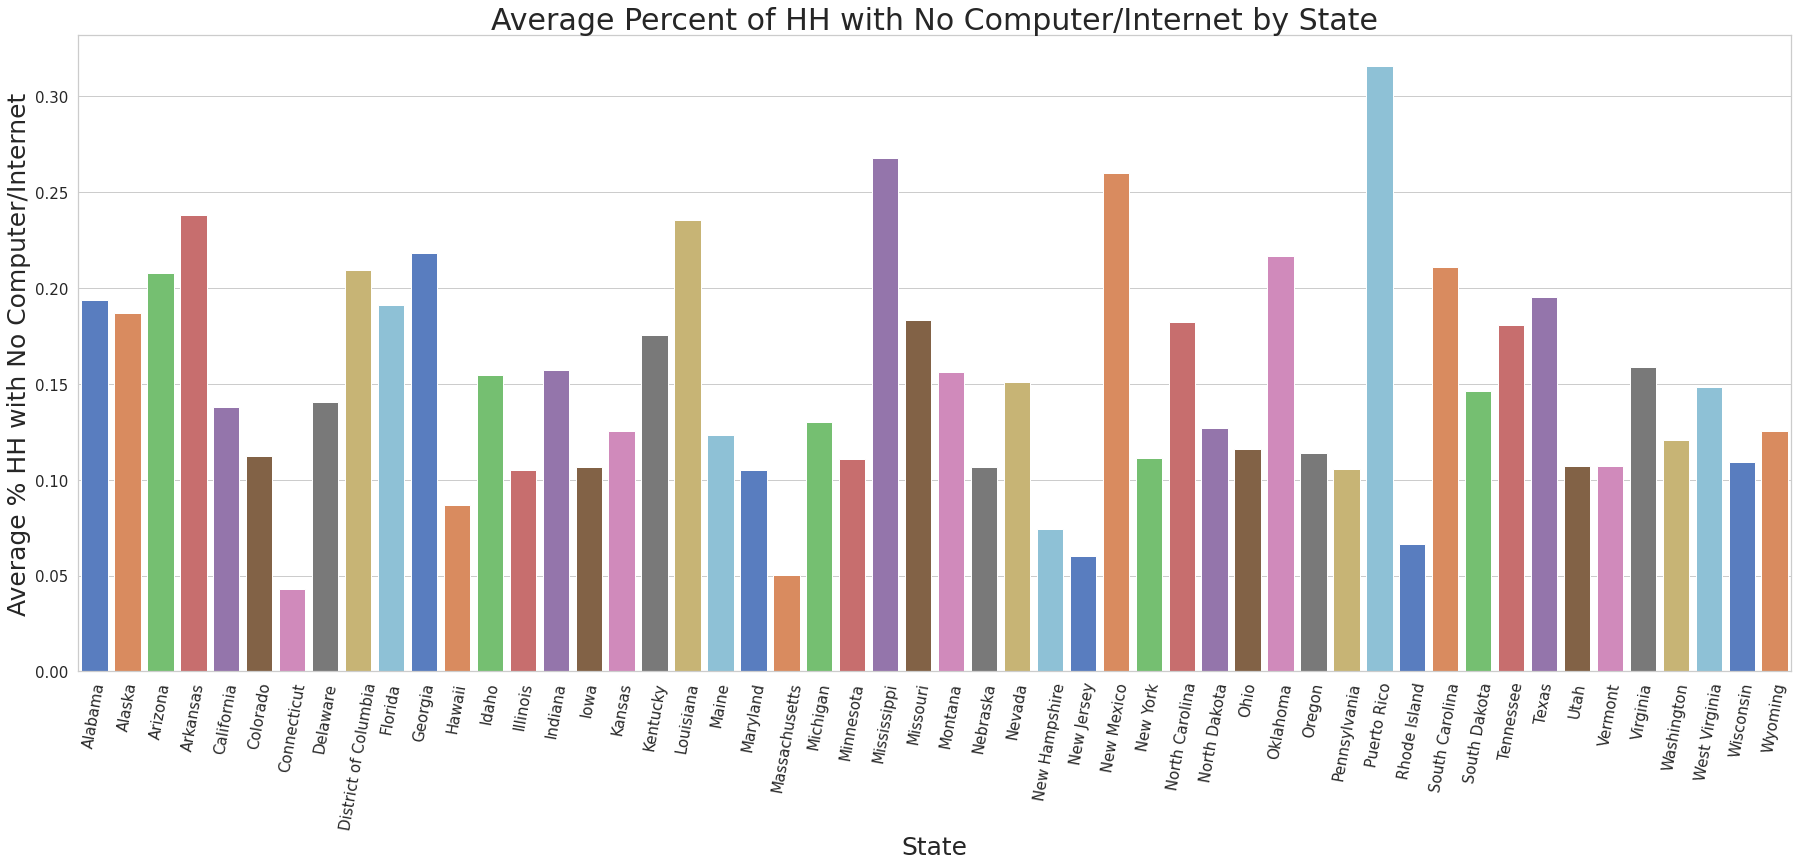

In [ ]:
grouped2 = df.groupby('state').agg({'pc_no_computer_or_internet': ['mean']})
grouped2.columns = ['pc_no_computer_or_internet']
grouped2 = grouped2.reset_index()
sns.barplot(data=grouped2, x="state", y="pc_no_computer_or_internet", palette="muted")
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("State", fontsize=25)
plt.ylabel("Average % HH with No Computer/Internet", fontsize=25)
plt.title("Average Percent of HH with No Computer/Internet by State", fontdict = {'fontsize' : 30})

Text(0.5, 1.0, 'Percent of HH in Poverty by Percent of HH with a Vulnerable Job')

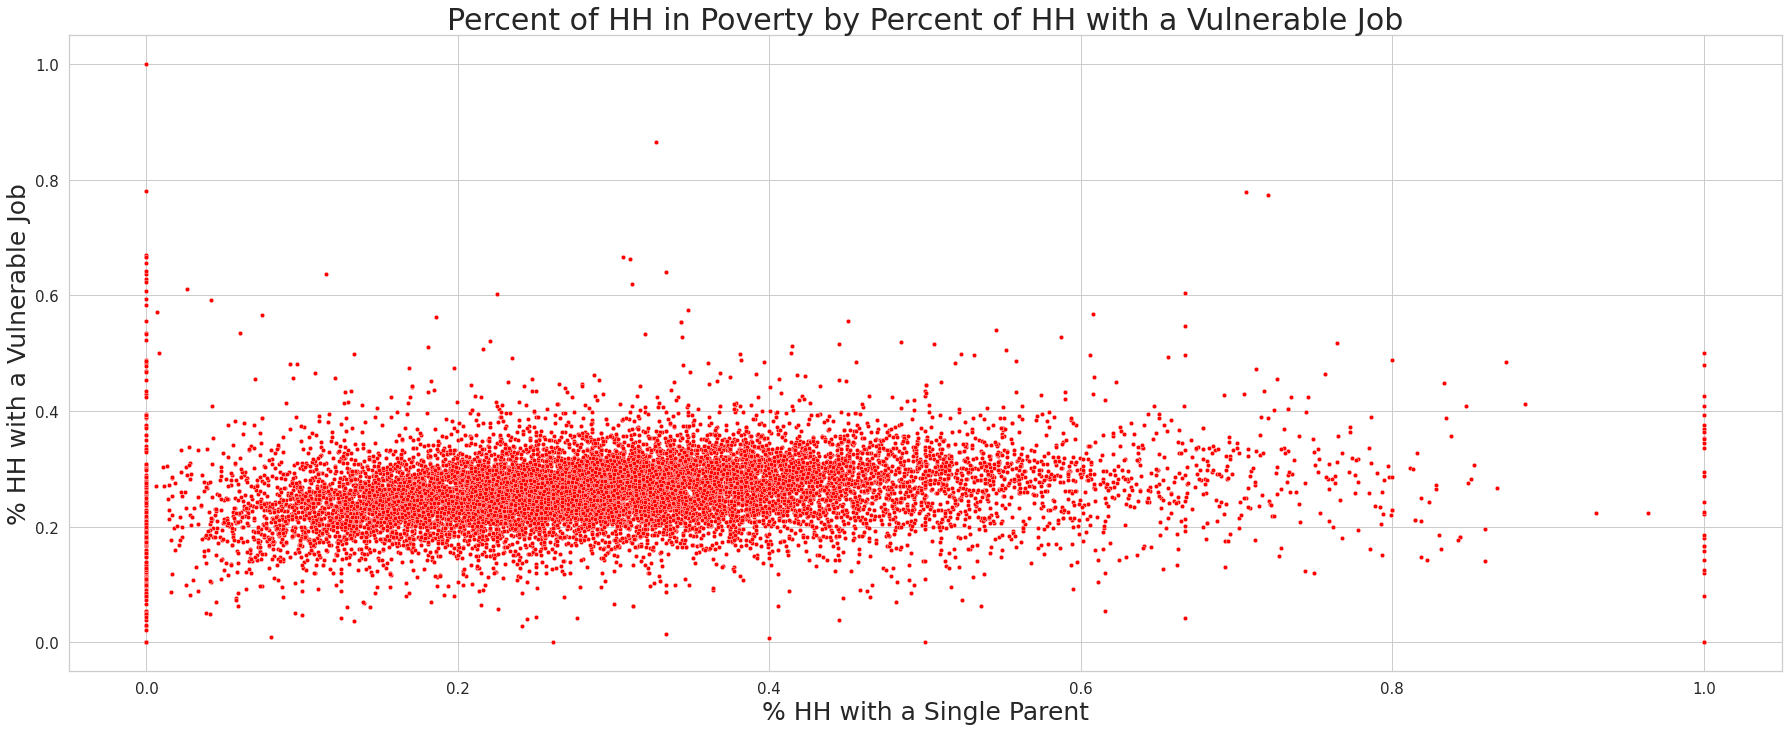

In [ ]:
sns.scatterplot(x='pc_single_parent', y="pc_vulnerable_job", data=df, color='red', s=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("% HH with a Single Parent", fontsize=25)
plt.ylabel("% HH with a Vulnerable Job", fontsize=25)
plt.title("Percent of HH in Poverty by Percent of HH with a Vulnerable Job", fontdict = {'fontsize' : 30})

Now we can begin to conduct some analysis with the variable we want to focus on, the percent of households in poverty. 

Text(0.5, 1.0, 'Percent of HH in Poverty by Percent of HH with a Single Parent')

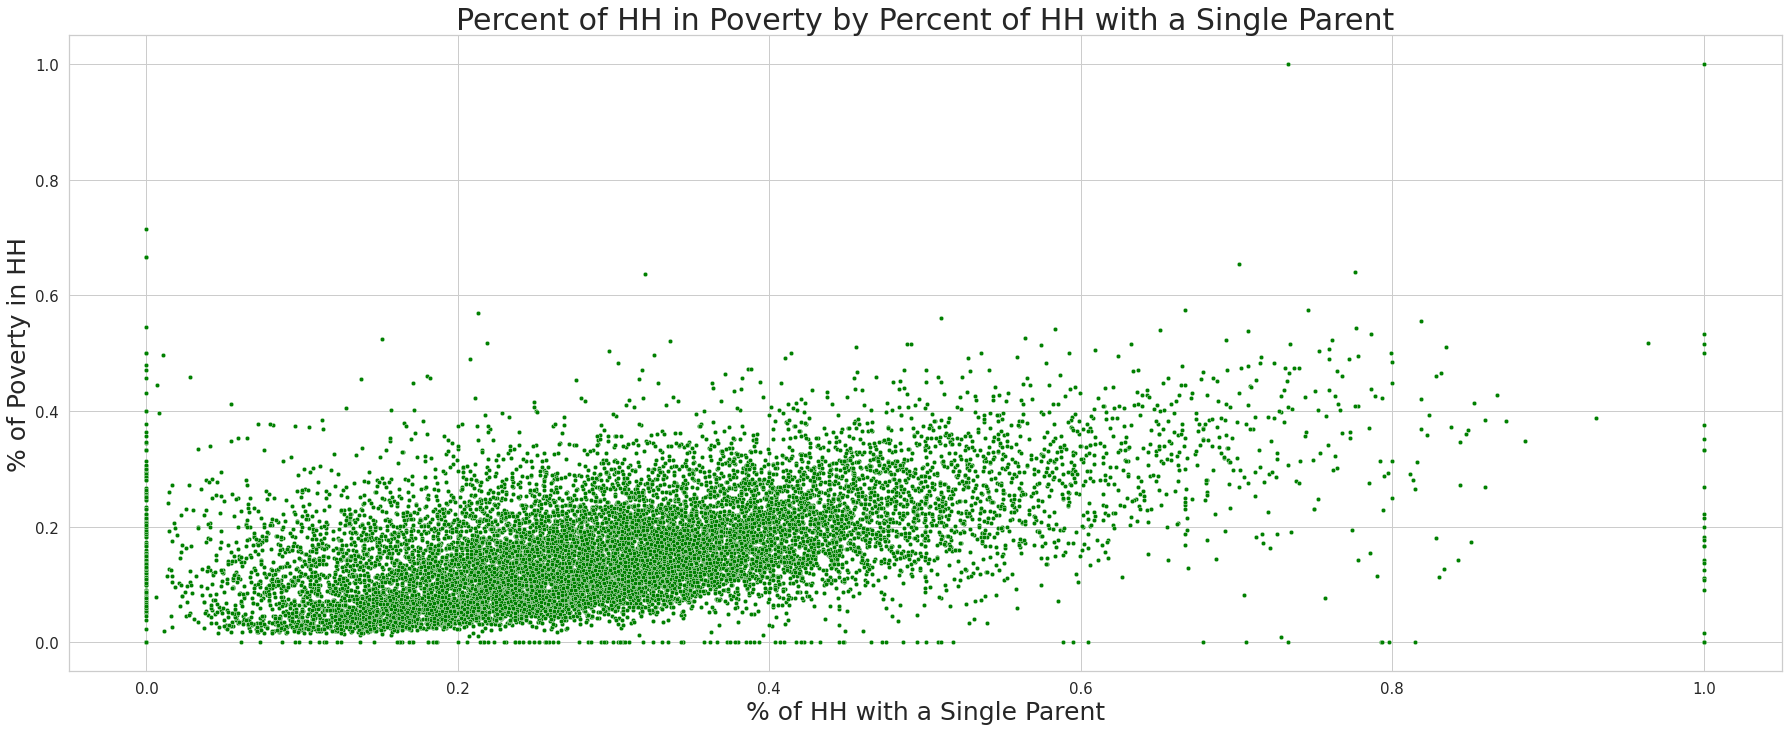

In [ ]:
# Creating scatter plot
sns.scatterplot(x='pc_single_parent', y="pc_poverty", data=df, color='green', s=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("% of HH with a Single Parent", fontsize=25)
plt.ylabel("% of Poverty in HH", fontsize=25)
plt.title("Percent of HH in Poverty by Percent of HH with a Single Parent", fontdict = {'fontsize' : 30})

Perhaps the school district size is a good indicator of the percent of households in poverty, as shown in the bar graph below.

Text(0.5, 1.0, 'Average Percent Poverty per HH by School District Size')

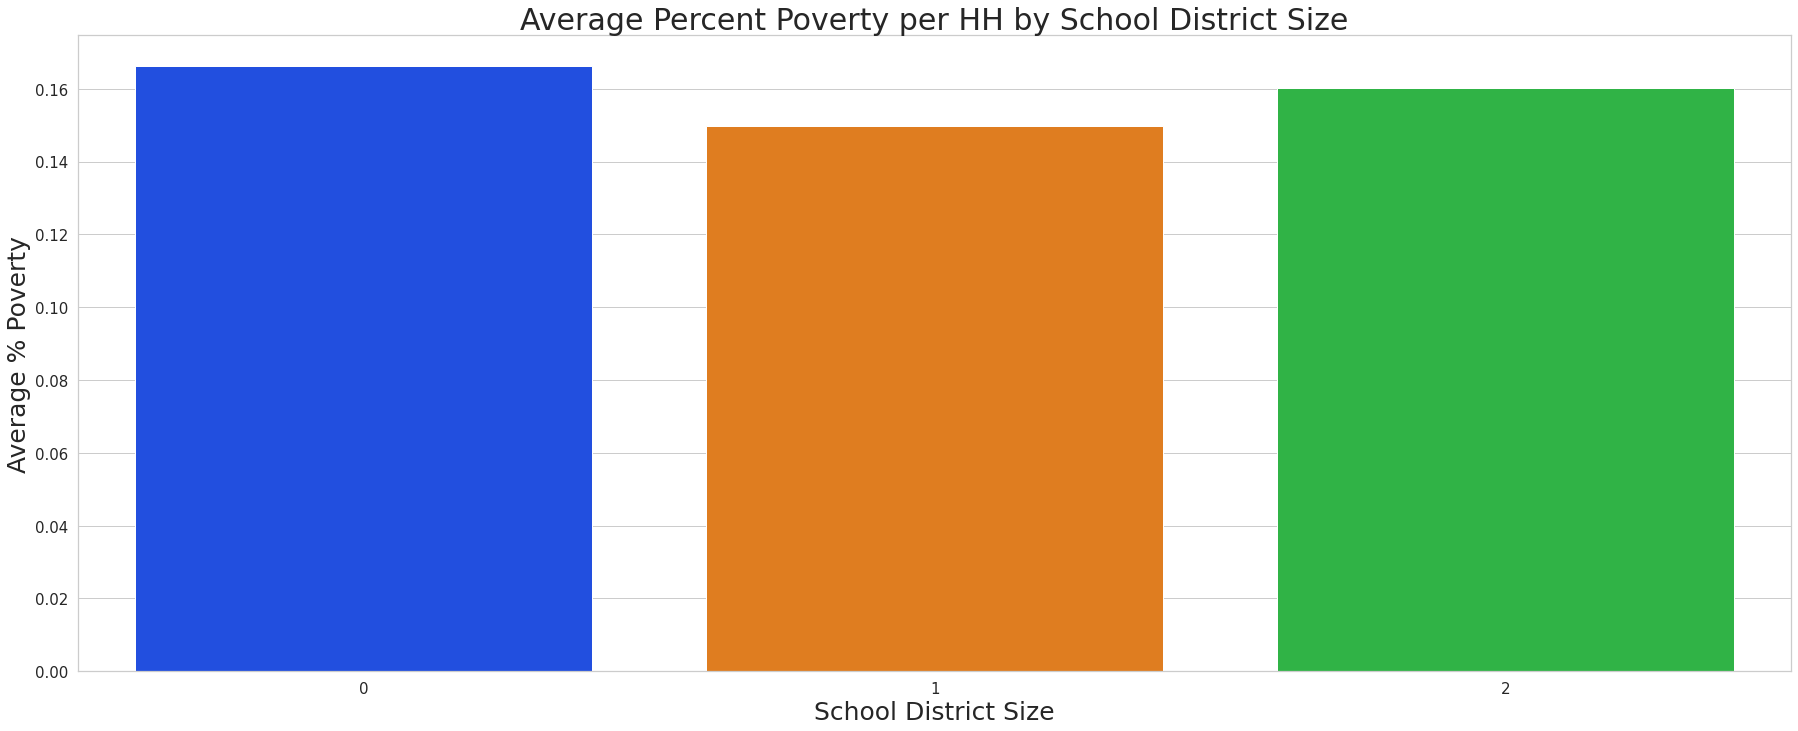

In [ ]:
# Creating a table
grouped4 = df.groupby('school_district_size').agg({'pc_poverty': ['mean']})
grouped4.columns = ['average_pc_poverty']
grouped4 = grouped4.reset_index()

ax = sns.barplot(data=grouped4, x="school_district_size", y="average_pc_poverty", palette="bright")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("School District Size", fontsize=25)
plt.ylabel("Average % Poverty", fontsize=25)
plt.title("Average Percent Poverty per HH by School District Size", fontdict = {'fontsize' : 30})


Plotting the data by state reveals the importance of state in predicting % of households in poverty.

Text(0.5, 1.0, 'Average Percent of HH in Poverty by State')

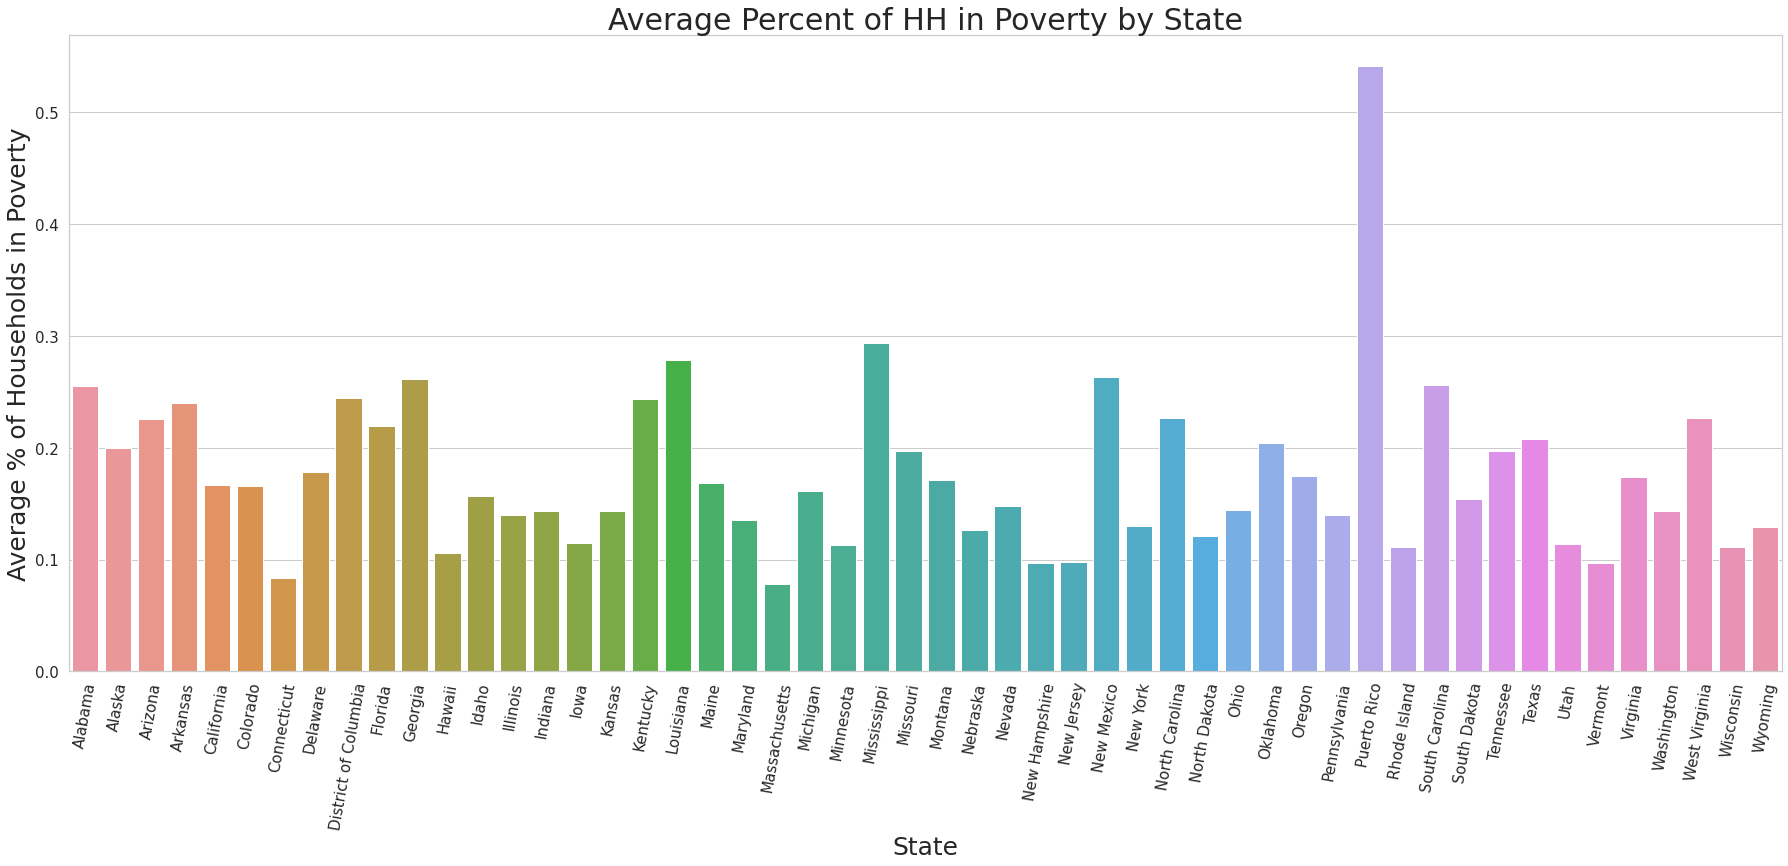

In [ ]:
# Creating a table
grouped5 = df.groupby('state').agg({'pc_poverty': ['mean']})
grouped5.columns = ['average_pc_poverty']
grouped5 = grouped5.reset_index()

ax = sns.barplot(data=grouped5, x="state", y="average_pc_poverty")
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("State", fontsize=25)
plt.ylabel("Average % of Households in Poverty", fontsize=25)
plt.title("Average Percent of HH in Poverty by State", fontdict = {'fontsize' : 30})

We can get poverty by school district in a specific state. This may be useful for funding.

Text(0.5, 1.0, 'Percent Households in Poverty by Connecticut School District')

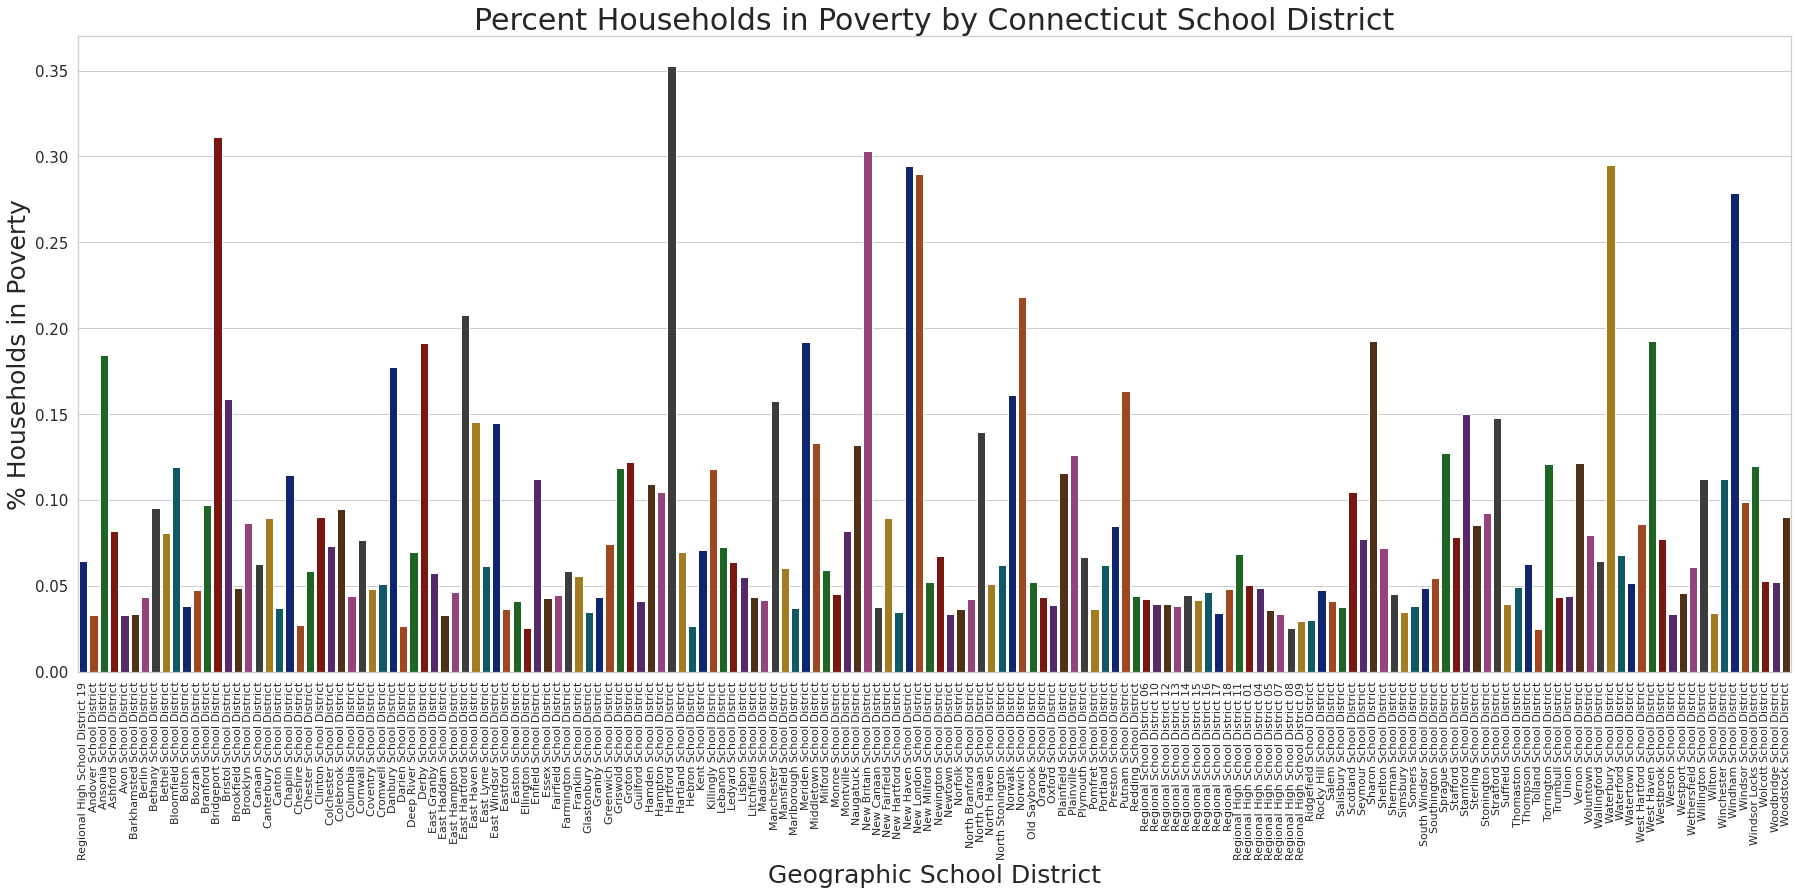

In [ ]:
# Creating table
chosen_state = 'Connecticut'
df_ct = df.loc[df['state'] == chosen_state]

sns.barplot(data=df_ct, x="geographic_school_district", y="pc_poverty", palette="dark")
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.xlabel("Geographic School District", fontsize=25)
plt.ylabel("% Households in Poverty", fontsize=25)
plt.title(f"Percent Households in Poverty by {chosen_state} School District", fontdict = {'fontsize' : 30})

## Simple Modeling

We can create a few models to see what variables affect percent of households in poverty the most. These variables can then be used to predict poverty.

The first model includes the variables `pc_single_parent`, `pc_vulnerable_job`, `pc_crowded_conditions`,`pc_no_computer_or_internet`, `pc_linguistically_isolated_children`, `pc_children_with_disability`.




In [ ]:
import numpy as np
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Creating numerical variable
df['y'] = df['pc_poverty']
df['x1'] = df['pc_single_parent']
df['x2'] = df['pc_vulnerable_job']
df['x3'] = df['pc_crowded_conditions']
df['x4'] = df['pc_no_computer_or_internet']
df['x5'] = df['pc_linguistically_isolated_children']
df['x6'] = df['pc_children_w_disability']


model1 = smf.ols(formula = "y ~ x1 + x2 + x3 + x4 + x5 + x6", data = df)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1866.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:38:26   Log-Likelihood:                 16594.
No. Observations:               13314   AIC:                        -3.317e+04
Df Residuals:                   13307   BIC:                        -3.312e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0235      0.003      8.528      0.000       0.018       0.029
x1             0.2282      0.005     49.288      0.000       0.219       0.237
x2             0.0236      0.010      2.378      0.017       0.004       0.043
x3             0.3665      0.022     16.820      0.000       0.324       0.409
x4             0.3039      0.006     53.491      0.000       0.293       0.315
x5            -0.0108      0.014     -0.771      0.441      -0.038       0.017
x6             0.2098      0.014     14.520      0.000       0.181       0.238
==============================================================================
Omnibus:                     3113.940   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20731.908
Skew:                           0.957   Prob(JB):                         0.00
Kurtosis:                       8.806   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the p-value for `x5` is not statistically significant. This suggests that `pc_linguistically_isolated_children` is not necessarily a good predictor of `pc_poverty`. We can confirm this by running the regression again, and observing a higher p-value.

In [ ]:
model2 = smf.ols(formula = "y ~ x1 + x2 + x3 + x4 + x6", data = df)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2239.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:38:27   Log-Likelihood:                 16594.
No. Observations:               13314   AIC:                        -3.318e+04
Df Residuals:                   13308   BIC:                        -3.313e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0235      0.003      8.531      0.000       0.018       0.029
x1             0.2283      0.005     49.306      0.000       0.219       0.237
x2             0.0233      0.010      2.354      0.019       0.004       0.043
x3             0.3591      0.020     18.325      0.000       0.321       0.398
x4             0.3036      0.006     53.556      0.000       0.293       0.315
x6             0.2104      0.014     14.587      0.000       0.182       0.239
==============================================================================
Omnibus:                     3116.891   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20767.688
Skew:                           0.958   Prob(JB):                         0.00
Kurtosis:                       8.811   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## More Complex Modeling

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df[['pc_single_parent', 'pc_vulnerable_job', 'pc_crowded_conditions', 'pc_no_computer_or_internet', 'pc_linguistically_isolated_children', 'pc_children_w_disability', 'state_num', 'school_district_size']]
y = df['pc_poverty']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_prediction)

0.46590063014177296

However, not all features may be useful, so we can use recursive feature elimination(RFE), which is a multiple regression analysis feature used to remove features that do not contribute significantly to the analysis.

In [ ]:
# Trying it again with better feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

LR2 = LinearRegression()

rfe = RFE(LR2, step=8)
rfe = rfe.fit(x_train, y_train)

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('pc_single_parent', True, 1),
 ('pc_vulnerable_job', False, 2),
 ('pc_crowded_conditions', True, 1),
 ('pc_no_computer_or_internet', True, 1),
 ('pc_linguistically_isolated_children', False, 2),
 ('pc_children_w_disability', True, 1),
 ('state_num', False, 2),
 ('school_district_size', False, 2)]

In [ ]:
x = df[['pc_single_parent', 'pc_crowded_conditions', 'pc_no_computer_or_internet', 'pc_children_w_disability']]
y = df['pc_poverty']

LR2 = LinearRegression()
LR2.fit(x_train,y_train)
y_prediction2 =  LR2.predict(x_test)

r2_score(y_test, y_prediction2)

0.46590063014177296

## Additional Analysis
This is a simple linear regression model. Further analysis could be a classification model to determine whether or not a government should provide funding to a school district. Additional factors that may affect poverty in a school district should possibly be considered, such as more metrics about a school district. 

It may be interesting to include some metric that determines the academic competence of children from these school districts. This could make it possible to analyze whether or not poverty affects academic competence.